In [1]:
run_id = "46688bb1-c37c24c3"

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import re

In [18]:
# parse log file
# some lines in log file will have the gram deviation
# like this:
# Gram deviation at step 210: 41.04749133851793
# extract the gram deviation and step

def parse_log_file(file_path) -> pd.DataFrame:
    with open(file_path, "r") as file:
        lines = file.readlines()
    gram_deviations = []
    for line in lines:
        if line[:22] == "Gram deviation at step":
            gram_deviation = float(line.split(":")[-1])
            # extract step with regex
            step = int(re.search(r'\d+', line).group())
            gram_deviations.append((step, gram_deviation))
    return pd.DataFrame(gram_deviations, columns=["step", "gram_deviation"])

df = parse_log_file(f"logs/{run_id}.txt")

In [19]:
df.head()

,step,gram_deviation
0,0,28.274352
1,10,29.108151
2,20,29.328002
3,30,29.839180
4,40,30.294462


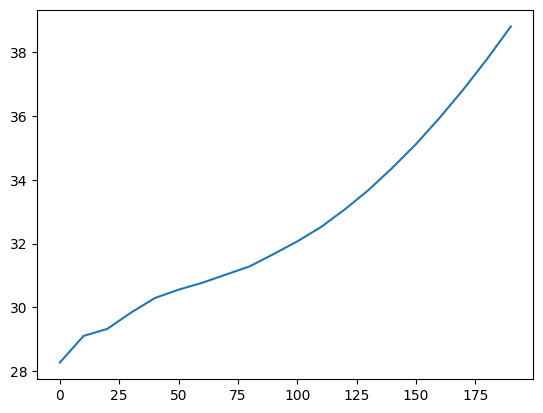

In [21]:
# plot gram deviation by step
df = df.loc[df["step"] < 200]
plt.plot(df["step"], df["gram_deviation"])
plt.show()
